训练集中呢，每个时段，30天共有多少人流，并画图

In [6]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame

data_train = pd.read_csv("data/Metro_train/record_2019-01-01.csv")
# data_train = pd.read_csv("data/Metro_test")


训练所有训练文件的路径

In [45]:
import os
rootdir = '/home/hzq/tianchi_metro/data/Metro_train'
list = os.listdir(rootdir) #列出文件夹下所有的目录与文件
trains = []
for i in range(0,len(list)):
    path = os.path.join(rootdir,list[i])
    if os.path.isfile(path):
        trains.append(path)
trains.sort()
print('\n'.join(trains[:8]))

/home/hzq/tianchi_metro/data/Metro_train/record_2019-01-01.csv
/home/hzq/tianchi_metro/data/Metro_train/record_2019-01-04.csv
/home/hzq/tianchi_metro/data/Metro_train/record_2019-01-08.csv
/home/hzq/tianchi_metro/data/Metro_train/record_2019-01-14.csv
/home/hzq/tianchi_metro/data/Metro_train/record_2019-01-03.csv
/home/hzq/tianchi_metro/data/Metro_train/record_2019-01-25.csv
/home/hzq/tianchi_metro/data/Metro_train/record_2019-01-05.csv
/home/hzq/tianchi_metro/data/Metro_train/record_2019-01-22.csv


In [33]:
# 训练文件格式
df.head() 

,time,lineID,stationID,deviceID,status,userID,payType
0,2019-01-01 02:00:05,B,27,1354,0,D13f76f42c9a677c4add94d9e480fb5c5,3
1,2019-01-01 02:01:40,B,5,200,1,D9a337d37d9512184b8e3fd477934b293,3
2,2019-01-01 02:01:53,B,5,247,0,Dc9e179298617f40b782490c1f3e2346c,3
3,2019-01-01 02:02:38,B,5,235,0,D9a337d37d9512184b8e3fd477934b293,3
4,2019-01-01 02:03:42,B,23,1198,0,Dd1cde61886c23fdb7ef1fdb76c9b1234,3


### 81个地铁站共25日的进出人数画图

In [94]:
# 统计81个地铁站25天总的进出数量
# station54是噪声点
cnt_in = {}
cnt_out = {}
for i in range(81):
    cnt_in[i] = 0
    cnt_out[i] = 0

for path in trains:
    df = pd.read_csv(path)
    for idx,dd in enumerate(df['status']):
        if dd == 0:
            cnt_out[df['stationID'][idx]] += 1
        else:
            cnt_in[df['stationID'][idx]] += 1

cnt_out
    

{0: 252437,
 1: 158717,
 2: 450492,
 3: 321051,
 4: 866930,
 5: 504260,
 6: 248947,
 7: 929280,
 8: 605143,
 9: 1280088,
 10: 705892,
 11: 677604,
 12: 659095,
 13: 534524,
 14: 505727,
 15: 2361276,
 16: 537726,
 17: 176214,
 18: 407615,
 19: 254585,
 20: 636473,
 21: 163222,
 22: 559631,
 23: 258650,
 24: 460782,
 25: 386559,
 26: 236240,
 27: 219237,
 28: 106106,
 29: 253173,
 30: 191590,
 31: 104700,
 32: 197077,
 33: 556154,
 34: 176070,
 35: 110583,
 36: 146822,
 37: 265879,
 38: 283542,
 39: 316129,
 40: 156990,
 41: 247810,
 42: 311048,
 43: 254061,
 44: 257596,
 45: 296132,
 46: 463009,
 47: 413612,
 48: 286372,
 49: 364873,
 50: 305724,
 51: 340857,
 52: 378382,
 53: 447932,
 54: 0,
 55: 403514,
 56: 486498,
 57: 367815,
 58: 351725,
 59: 357098,
 60: 253703,
 61: 279652,
 62: 273693,
 63: 275905,
 64: 130839,
 65: 213671,
 66: 149822,
 67: 160915,
 68: 147907,
 69: 250134,
 70: 249317,
 71: 162983,
 72: 98331,
 73: 274533,
 74: 80078,
 75: 324915,
 76: 392849,
 77: 367921,
 

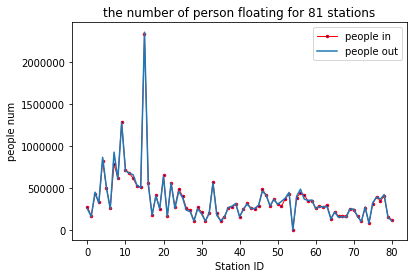

In [296]:
import matplotlib.pyplot as plt
x1=[]; y1=[]; x2=[]; y2=[]
for key in cnt_in:
    x1.append(key)
    y1.append(cnt_in[key])
for key in cnt_out:
    x2.append(key)
    y2.append(cnt_out[key])
plt.plot(x1,y1,label='people in',linewidth=1,color='r',marker='.', markerfacecolor='blue',markersize=5) 
plt.plot(x2,y2,label='people out') 
plt.xlabel('Station ID') 
plt.ylabel('people num') 
plt.title('the number of person floating for 81 stations') 
plt.legend() 
plt.show() 


##  每日81个地铁站的进出人数画图，共25天

In [118]:
# 统计81个地铁站25天总的进出数量 [1月1日 ~ 1月25日]
day_in = {}
day_out = {}
for i in range(26):
    day_in[i] = 0
    day_out[i] = 0
trains.sort()
for idx,path in enumerate(trains):
    df = pd.read_csv(path)
    for dd in df['status']:
        if dd == 0:
            day_out[idx+1] += 1
        else:
            day_in[idx+1] += 1
    print("day" + str(idx+1), end=' ,')


day1 ,day2 ,day3 ,day4 ,day5 ,day6 ,day7 ,day8 ,day9 ,day10 ,day11 ,day12 ,day13 ,day14 ,day15 ,day16 ,day17 ,day18 ,day19 ,day20 ,day21 ,day22 ,day23 ,day24 ,day25 ,

In [140]:
# 列表展示
print('day,   in,   out,   abs')
for idx, num in enumerate(day_in):
    if idx==0:continue
    print(str(idx) + ': ' + str(day_in[idx]) + '   ' + str(day_out[idx]) + '   ' + str(abs(day_in[idx]-day_out[idx])))

day,   in,   out,   abs
1: 1270547   1269045   1502
2: 1187799   1188663   864
3: 1146469   1147002   533
4: 1211535   1212307   772
5: 1006887   1011043   4156
6: 973818   974441   623
7: 1128213   1129221   1008
8: 1151957   1152871   914
9: 1140025   1141438   1413
10: 1157908   1159623   1715
11: 1249994   1251866   1872
12: 1083797   1084767   970
13: 1031230   1032358   1128
14: 1197939   1199228   1289
15: 1153423   1152828   595
16: 1207951   1209108   1157
17: 1236936   1237837   901
18: 1331633   1332770   1137
19: 1104492   1104846   354
20: 1056816   1056825   9
21: 1232911   1233048   137
22: 1237937   1238371   434
23: 1261750   1262212   462
24: 1258873   1258497   376
25: 1288580   1287602   978


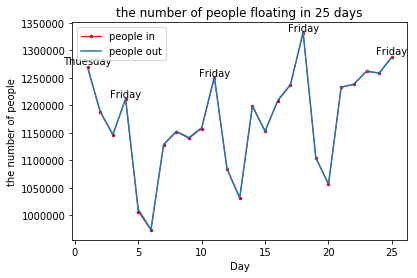

In [138]:
# 折线图展示
import matplotlib.pyplot as plt
x1=[]; y1=[]; x2=[]; y2=[]
for key in day_in:
    x1.append(key)
    y1.append(day_in[key])
for key in day_out:
    x2.append(key)
    y2.append(day_out[key])
x1=x1[1:]; y1=y1[1:]; x2=x2[1:]; y2=y2[1:]
plt.plot(x1,y1,label='people in',linewidth=1,color='r',marker='.', markerfacecolor='blue',markersize=5) 
plt.plot(x2,y2,label='people out') 
plt.xlabel('Day') 
plt.ylabel('the number of people') 
plt.title('the number of people floating in 25 days')

plt.text(x1[0], y1[0], 'Thuesday', ha='center', va='bottom', fontsize=10)

plt.text(x1[3], y1[3], 'Friday', ha='center', va='bottom', fontsize=10)
plt.text(x1[10], y1[10], 'Friday', ha='center', va='bottom', fontsize=10)
plt.text(x1[17], y1[17], 'Friday', ha='center', va='bottom', fontsize=10)
plt.text(x1[24], y1[24], 'Friday', ha='center', va='bottom', fontsize=10)

plt.legend() 
plt.show() 


##  每日81个地铁站的进出人数画图，共28天

In [452]:
day28_in = day_in
day28_out = day_out
day28_path = '/home/hzq/tianchi_metro/data/splitByStation/'
day28_in[26]=0; day28_in[27]=0; day28_in[28]=0
day28_out[26]=0; day28_out[27]=0; day28_out[28]=0
# 统计81个地铁站25天总的进出数量 [1月1日 ~ 1月25日]

def getDayNum(day='26',path='/home/hzq/tianchi_metro/data/splitByStation/day'):
    for ID in range(81):
        file_path = path + day + '/station' + str(ID) + '.csv'
        df = pd.read_csv(file_path)
        for idx,num in enumerate(df['inNums']):
            day28_in[int(day)] += num
            day28_out[int(day)] += df['outNums'][idx]

getDayNum(day='26')
getDayNum(day='27')
getDayNum(day='28')    


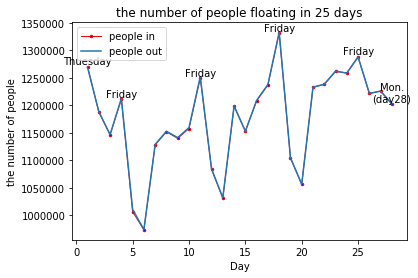

In [461]:
# 折线图展示
# 26,27号是预测出来的
import matplotlib.pyplot as plt
x1=[]; y1=[]; x2=[]; y2=[]
for key in day_in:
    x1.append(key)
    y1.append(day28_in[key])
for key in day_out:
    x2.append(key)
    y2.append(day28_out[key])
x1=x1[1:]; y1=y1[1:]; x2=x2[1:]; y2=y2[1:]
plt.plot(x1,y1,label='people in',linewidth=1,color='r',marker='.', markerfacecolor='blue',markersize=5) 
plt.plot(x2,y2,label='people out') 
plt.xlabel('Day') 
plt.ylabel('the number of people') 
plt.title('the number of people floating in 25 days')

plt.text(x1[0], y1[0], 'Thuesday', ha='center', va='bottom', fontsize=10)

plt.text(x1[3], y1[3], 'Friday', ha='center', va='bottom', fontsize=10)
plt.text(x1[10], y1[10], 'Friday', ha='center', va='bottom', fontsize=10)
plt.text(x1[17], y1[17], 'Friday', ha='center', va='bottom', fontsize=10)
plt.text(x1[24], y1[24], 'Friday', ha='center', va='bottom', fontsize=10)
plt.text(x1[27], y1[27], 'Mon.\n(day28)', ha='center', va='bottom', fontsize=10)

plt.legend() 
plt.show() 


## 训练数据重新分类 
训练数据整理成文件夹
```
station_1.csv / day1 / 144行: time_block, inNums, outNums
station_2.csv / dat2 /
```
这部分可复用接口：getTimeIdx()

In [253]:
# getTimeIdx(time): 传入时间，返回对应idx，时间格式2019-01-01 02:00:05
# the range of id : [0:143]
'''
# 接口： time2idx
{'00:00:00': 0,
 '00:10:00': 1,
 '00:20:00': 2,
 '00:30:00': 3,
 '00:40:00': 4,
'''
def strToList(str):
    LL = []
    for i in str:
        LL.append(i)
    return LL

def sec2time(ss):
    mm = ss // 60
    ss = ss % 60
    hh = mm // 60
    mm = mm % 60
    if hh<10: hh = '0'+str(hh)
    if mm<10: mm = '0'+str(mm)
    if ss<10: ss = '0'+str(ss)
    return (str(hh) + ':' + str(mm) + ':' + str(ss))

time2idx = {}
def getTimeList():
    for ss in range(144):
        time2idx[sec2time(ss*600)] = ss

# 找到这个时间属于哪个段
def getTimeIdx(ttime): # read : 2019-01-01 02:00:05
    # 这里有个疑问， 这个00:00, 00:10是不是左开右闭
    time = strToList(ttime)
    time = time[-8:]
    hh = time[:2]
    mm = time[3:4];
    ss = time[-2:]
#     print(str(hh[0]) + str(hh[1]) + ':' + str(mm[0]) + '0:00')
    return time2idx[str(hh[0]) + str(hh[1]) + ':' + str(mm[0]) + '0:00']

getTimeList()

# use
# 传入时间，返回对应idx，时间格式2019-01-01 02:00:05
# t = getTimeIdx("02:42:59")


In [295]:
# 文件夹里面应该是: time, inNums, outNums
trains.sort()
# inNums[station3][timeIdx] += 1
# inNums[80][143] = 2008

def save_day_file(save_path, inNums, outNums):
    if os.path.exists(save_path) == False:
        os.makedirs(save_path)
    for station in range(81):
        with open(save_path + "/station" + str(station) + ".csv", 'w') as fw:
            fw.write("time,inNums,outNums\n")
            for i in range(144):
                fw.write(str(i+1) + ',' + str(inNums["station" + str(station)][i]) + ',' +  str(outNums["station"+str(station)][i]) + '\n')

for day, path in enumerate(trains): # day+1
    rootdir = '/home/hzq/tianchi_metro/data/splitByStation'
    save_path = os.path.join(rootdir, "day" + str(day+1)) # 25天
    # print(save_path)
    if os.path.exists(save_path) == False:
        os.makedirs(save_path)

    inNums = {}
    for i in range(81):  # station from 0 to 80
        inNums["station" + str(i)] = {}
        for jj in range(144):
            inNums["station" + str(i)][jj] = 0
    outNums = {}
    for i in range(81):  # station from 0 to 80
        outNums["station" + str(i)] = {}
        for jj in range(144):
            outNums["station" + str(i)][jj] = 0

    df = pd.read_csv(path)  # time, stationID, status
    # inNums[station3][timeIdx] += 1
    # inNums[0:80][0:143] = 2008
    for idx,dd in enumerate(df['status']):
        if dd == 0:
            outNums["station" + str(df['stationID'][idx])][getTimeIdx(df['time'][idx])] += 1
        else:
            inNums["station" + str(df['stationID'][idx])][getTimeIdx(df['time'][idx])] += 1
    save_day_file(save_path, inNums, outNums)
    print("Day" + str(day) + ',' , end='')



Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,Day10,Day11,Day12,Day13,Day14,Day15,Day16,Day17,Day18,Day19,Day20,Day21,Day22,Day23,Day24,

### baseline: 拿station0的25天的数据做一个回归
station0共有144条回归线

最终分数：
>score:15.3507

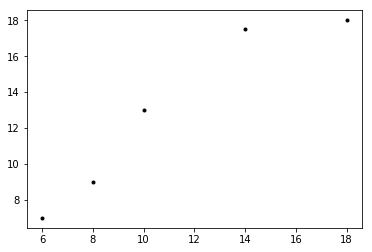

array([1.96551724])

array([[0.9762931]])

13.681034482758621


In [336]:
# 网上找的一个回归的例子，用来参考
from sklearn.linear_model import LinearRegression
#创建并拟合模型
model=LinearRegression()
x=[[6],[8],[10],[14],[18]]
y=[[7],[9],[13],[17.5],[18]]
model.fit(x,y)
plt.plot(x, y, 'k.')
plt.show()

display(model.intercept_)  #截距
display(model.coef_)  #线性模型的系数
a = model.predict([[12]])
# a[0][0]
print(model.predict([[12]])[0][0])


In [391]:
# for station0
# station0_x = [timeBucket 0:143][day1 1:25]

def getStationIn(stationID='0', path = '/home/hzq/tianchi_metro/data/splitByStation/day', is_inNums=True):
    '''
    Read data by station and timeBlock: 
    
    return station[ID]_in_y = [0:143][0:24]
    or
    return station[ID]_out_y = [0:143][0:24]
    '''
    file_name = 'station' + stationID + '.csv'
    station0_in_y = []
    for i in range(144):
        station0_in_y.append([])
    for dd in range(25):
        day = dd+1
        file_path = path + str(day)
        path1 = os.path.join(file_path, file_name)
        df = pd.read_csv(path1)
    #     print(df.head())
        if is_inNums == True:
            for time,num in enumerate(df['inNums']): # 144
                station0_in_y[time].append(num)
        else:
            for time,num in enumerate(df['outNums']):
                station0_in_y[time].append(num)
    return station0_in_y

def getAnsIn(stationID,is_inNums):
    '''
    简单的一元回归
    return 144 num in day29    
    '''
    ans0_in = []
    station0_in_y = getStationIn(stationID=str(stationID), is_inNums=is_inNums)
    for i in station0_in_y:
        Y = [[jj] for jj in i]
        X = [[jj+1] for jj in range(25)]
        from sklearn.linear_model import LinearRegression
        #创建并拟合模型
        model=LinearRegression()
        model.fit(X,Y)
#         plt.plot(X, Y, 'k.')
#         plt.show()
#         display(model.intercept_)  #截距
#         display(model.coef_)  #线性模型的系数
        ans0_in.append(max(0,math.floor(model.predict([[29]])[0][0])))
    return ans0_in


res_in = [] # 144 * 81 = 11664
res_out = []
for stationID in range(81):
    ans = getAnsIn(stationID=stationID, is_inNums=True) # ans = [0:143] ; 共需要81个ans 
    res_in = res_in + ans
    ans = getAnsIn(stationID=stationID, is_inNums=False)
    res_out = res_out + ans
print(len(res_in))
print(len(res_out))


11664
11664


In [393]:
# 将得到的114*81=11664个结果写入上传文件中
path = '/home/hzq/tianchi_metro/data/Metro_testA/testA_submit_2019-01-29.csv'
save_path = '/home/hzq/tianchi_metro/data/Metro_testA/mazic.csv'
with open(path, 'r') as fr:
    with open(save_path, 'w') as fw:
        fw.write(fr.readline())
        for idx,line in enumerate(fr):
            fw.write(line[:-1])
            fw.write(',')
            fw.write(str(res_in[idx]))
            fw.write(',')
            fw.write(str(res_out[idx]))
            fw.write('\n')

## baseline改进1(多加一天- -!): 拿每个station的*26天*的数据做一个回归

最终分数
> score: 14.17

In [400]:
# for station0
# station0_x = [timeBucket 0:143][day1 1:25]

def getStationIn(stationID='0', path = '/home/hzq/tianchi_metro/data/splitByStation/day', is_inNums=True):
    '''
    Read data by station and timeBlock: 
    
    return station[ID]_in_y = [0:143][0:24]
    or
    return station[ID]_out_y = [0:143][0:24]
    '''
    file_name = 'station' + stationID + '.csv'
    station0_in_y = []
    for i in range(144):
        station0_in_y.append([])
    for dd in range(25):
        day = dd+1
        file_path = path + str(day)
        path1 = os.path.join(file_path, file_name)
        df = pd.read_csv(path1)
    #     print(df.head())
        if is_inNums == True:
            for time,num in enumerate(df['inNums']): # 144
                station0_in_y[time].append(num)
        else:
            for time,num in enumerate(df['outNums']):
                station0_in_y[time].append(num)
    '''
    以下，增加多一天,28号
    '''
    day = 28
    file_path = path + str(day)
    path1 = os.path.join(file_path, file_name)
    df = pd.read_csv(path1)
    if is_inNums == True:
        for time,num in enumerate(df['inNums']): # 144
            station0_in_y[time].append(num)
    else:
        for time,num in enumerate(df['outNums']):
            station0_in_y[time].append(num)
    return station0_in_y

def getAnsIn(stationID,is_inNums):
    '''
    简单的一元回归
    return 144 num in day29    
    '''
    ans0_in = []
    station0_in_y = getStationIn(stationID=str(stationID), is_inNums=is_inNums)
    for i in station0_in_y:
        Y = [[jj] for jj in i]
        X = [[jj+1] for jj in range(25)]
        X.append([28])
        from sklearn.linear_model import LinearRegression
        #创建并拟合模型
        model=LinearRegression()
        model.fit(X,Y)
#         plt.plot(X, Y, 'k.')
#         plt.show()
#         display(model.intercept_)  #截距
#         display(model.coef_)  #线性模型的系数
        ans0_in.append(max(0,math.floor(model.predict([[29]])[0][0])))
    return ans0_in


res_in = [] # 144 * 81 = 11664
res_out = []
for stationID in range(81):
    ans = getAnsIn(stationID=stationID, is_inNums=True) # ans = [0:143] ; 共需要81个ans 
    res_in = res_in + ans
    ans = getAnsIn(stationID=stationID, is_inNums=False)
    res_out = res_out + ans
print(len(res_in))
print(len(res_out))


11664
11664


In [401]:
# 将得到的114*81=11664个结果写入上传文件中
path = '/home/hzq/tianchi_metro/data/Metro_testA/testA_submit_2019-01-29.csv'
save_path = '/home/hzq/tianchi_metro/data/Metro_testA/mazic1.csv'
with open(path, 'r') as fr:
    with open(save_path, 'w') as fw:
        fw.write(fr.readline())
        for idx,line in enumerate(fr):
            fw.write(line[:-1])
            fw.write(',')
            fw.write(str(res_in[idx]))
            fw.write(',')
            fw.write(str(res_out[idx]))
            fw.write('\n')

## baseline改进2(少加2天- -!): 拿每个station的24天的数据做一个回归

根据上面25天的流量图，前两天的数据比较bug，把1月1日跟1月2日的去掉，最终留下3~25 + 28

最终得分:
> 不如前两个

In [410]:
# for station0
# station0_x = [timeBucket 0:143][day1 1:25]

def getStationIn(stationID='0', path = '/home/hzq/tianchi_metro/data/splitByStation/day', is_inNums=True):
    '''
    Read data by station and timeBlock: 
    
    return station[ID]_in_y = [0:143][0:24]
    or
    return station[ID]_out_y = [0:143][0:24]
    '''
    file_name = 'station' + stationID + '.csv'
    station0_in_y = []
    for i in range(144):
        station0_in_y.append([])
    for dd in range(25):
        day = dd+1
        if day == 1:continue
        if day == 2:continue
        file_path = path + str(day)
        path1 = os.path.join(file_path, file_name)
        df = pd.read_csv(path1)
    #     print(df.head())
        if is_inNums == True:
            for time,num in enumerate(df['inNums']): # 144
                station0_in_y[time].append(num)
        else:
            for time,num in enumerate(df['outNums']):
                station0_in_y[time].append(num)
    '''
    以下，增加多一天,28号
    '''
    day = 28
    file_path = path + str(day)
    path1 = os.path.join(file_path, file_name)
    df = pd.read_csv(path1)
    if is_inNums == True:
        for time,num in enumerate(df['inNums']): # 144
            station0_in_y[time].append(num)
    else:
        for time,num in enumerate(df['outNums']):
            station0_in_y[time].append(num)
    return station0_in_y

def getAnsIn(stationID,is_inNums):
    '''
    简单的一元回归
    return 144 num in day29    
    '''
    ans0_in = []
    station0_in_y = getStationIn(stationID=str(stationID), is_inNums=is_inNums)
    for i in station0_in_y:
        Y = [[jj] for jj in i]
        X = [[jj+1] for jj in range(25)]
        X.append([28])
        X = X[2:]
        from sklearn.linear_model import LinearRegression
        #创建并拟合模型
        model=LinearRegression()
        model.fit(X,Y)
#         plt.plot(X, Y, 'k.')
#         plt.show()
#         display(model.intercept_)  #截距
#         display(model.coef_)  #线性模型的系数
        ans0_in.append(max(0,math.floor(model.predict([[29]])[0][0])))
    return ans0_in


res_in = [] # 144 * 81 = 11664
res_out = []
for stationID in range(81):
    ans = getAnsIn(stationID=stationID, is_inNums=True) # ans = [0:143] ; 共需要81个ans 
    res_in = res_in + ans
    ans = getAnsIn(stationID=stationID, is_inNums=False)
    res_out = res_out + ans
print(len(res_in))
print(len(res_out))


11664
11664


In [411]:
# 将得到的114*81=11664个结果写入上传文件中
path = '/home/hzq/tianchi_metro/data/Metro_testA/testA_submit_2019-01-29.csv'
save_path = '/home/hzq/tianchi_metro/data/Metro_testA/mazic2.csv'
with open(path, 'r') as fr:
    with open(save_path, 'w') as fw:
        fw.write(fr.readline())
        for idx,line in enumerate(fr):
            fw.write(line[:-1])
            fw.write(',')
            fw.write(str(res_in[idx]))
            fw.write(',')
            fw.write(str(res_out[idx]))
            fw.write('\n')

### baseline改进3(先预测26,27号,再一起预测29号): 拿每个station的*26天*的数据做一个回归

In [417]:
# 先预测26号的
def getStationIn(stationID='0', path = '/home/hzq/tianchi_metro/data/splitByStation/day', is_inNums=True):
    '''
    Read data by station and timeBlock: 
    
    return station[ID]_in_y = [0:143][0:24]
    or
    return station[ID]_out_y = [0:143][0:24]
    '''
    file_name = 'station' + stationID + '.csv'
    station0_in_y = []
    for i in range(144):
        station0_in_y.append([])
    for dd in range(25):
        day = dd+1
        file_path = path + str(day)
        path1 = os.path.join(file_path, file_name)
        df = pd.read_csv(path1)
    #     print(df.head())
        if is_inNums == True:
            for time,num in enumerate(df['inNums']): # 144
                station0_in_y[time].append(num)
        else:
            for time,num in enumerate(df['outNums']):
                station0_in_y[time].append(num)
    '''
    以下，增加多一天,28号
    '''
    day = 28
    file_path = path + str(day)
    path1 = os.path.join(file_path, file_name)
    df = pd.read_csv(path1)
    if is_inNums == True:
        for time,num in enumerate(df['inNums']): # 144
            station0_in_y[time].append(num)
    else:
        for time,num in enumerate(df['outNums']):
            station0_in_y[time].append(num)
    return station0_in_y

def getAnsIn(stationID,is_inNums):
    '''
    简单的一元回归
    return 144 num in day26   
    '''
    ans0_in = []
    station0_in_y = getStationIn(stationID=str(stationID), is_inNums=is_inNums)
    for i in station0_in_y:
        Y = [[jj] for jj in i]
        X = [[jj+1] for jj in range(25)]
        X.append([28])
        from sklearn.linear_model import LinearRegression
        #创建并拟合模型
        model=LinearRegression()
        model.fit(X,Y)
#         plt.plot(X, Y, 'k.')
#         plt.show()
#         display(model.intercept_)  #截距
#         display(model.coef_)  #线性模型的系数
        ans0_in.append(max(0,math.floor(model.predict([[26]])[0][0])))
    return ans0_in

def predict_day26(inNums, outNums, stationID, path='/home/hzq/tianchi_metro/data/splitByStation/day', day='26'):
    with open(path + str(day) + '/station' + str(stationID) + '.csv', 'w') as fw:
        fw.write('day,inNums,outNums\n')
        for idx, num in enumerate(inNums):
            fw.write(str(idx+1))
            fw.write(',')
            fw.write(str(num))
            fw.write(',')
            fw.write(str(outNums[idx]))
            fw.write('\n')

res_in = [] # 144 * 81 = 11664
res_out = []
for stationID in range(81):
    ans = getAnsIn(stationID=stationID, is_inNums=True) # ans = [0:143] ; 共需要81个ans 
#     res_in = res_in + ans
    ans1 = getAnsIn(stationID=stationID, is_inNums=False)
#     res_out = res_out + ans
    predict_day26(ans, ans1, stationID, day = '26')


In [418]:
# 再预测27号的
def getStationIn(stationID='0', path = '/home/hzq/tianchi_metro/data/splitByStation/day', is_inNums=True):
    '''
    Read data by station and timeBlock: 
    
    return station[ID]_in_y = [0:143][0:24]
    or
    return station[ID]_out_y = [0:143][0:24]
    '''
    file_name = 'station' + stationID + '.csv'
    station0_in_y = []
    for i in range(144):
        station0_in_y.append([])
    for dd in range(25):
        day = dd+1
        file_path = path + str(day)
        path1 = os.path.join(file_path, file_name)
        df = pd.read_csv(path1)
    #     print(df.head())
        if is_inNums == True:
            for time,num in enumerate(df['inNums']): # 144
                station0_in_y[time].append(num)
        else:
            for time,num in enumerate(df['outNums']):
                station0_in_y[time].append(num)
    '''
    以下，增加多一天,28号
    '''
    day = 28
    file_path = path + str(day)
    path1 = os.path.join(file_path, file_name)
    df = pd.read_csv(path1)
    if is_inNums == True:
        for time,num in enumerate(df['inNums']): # 144
            station0_in_y[time].append(num)
    else:
        for time,num in enumerate(df['outNums']):
            station0_in_y[time].append(num)
    return station0_in_y

def getAnsIn(stationID,is_inNums):
    '''
    简单的一元回归
    return 144 num in day27  
    '''
    ans0_in = []
    station0_in_y = getStationIn(stationID=str(stationID), is_inNums=is_inNums)
    for i in station0_in_y:
        Y = [[jj] for jj in i]
        X = [[jj+1] for jj in range(25)]
        X.append([28])
        from sklearn.linear_model import LinearRegression
        #创建并拟合模型
        model=LinearRegression()
        model.fit(X,Y)
#         plt.plot(X, Y, 'k.')
#         plt.show()
#         display(model.intercept_)  #截距
#         display(model.coef_)  #线性模型的系数
        ans0_in.append(max(0,math.floor(model.predict([[27]])[0][0])))
    return ans0_in

def predict_day27(inNums, outNums, stationID, path='/home/hzq/tianchi_metro/data/splitByStation/day', day='27'):
    with open(path + str(day) + '/station' + str(stationID) + '.csv', 'w') as fw:
        fw.write('day,inNums,outNums\n')
        for idx, num in enumerate(inNums):
            fw.write(str(idx+1))
            fw.write(',')
            fw.write(str(num))
            fw.write(',')
            fw.write(str(outNums[idx]))
            fw.write('\n')

res_in = [] # 144 * 81 = 11664
res_out = []
for stationID in range(81):
    ans = getAnsIn(stationID=stationID, is_inNums=True) # ans = [0:143] ; 共需要81个ans 
#     res_in = res_in + ans
    ans1 = getAnsIn(stationID=stationID, is_inNums=False)
#     res_out = res_out + ans
    predict_day27(ans, ans1, stationID, day = '27')


In [419]:
# 用1~28的来预测29的
# for station0
# station0_x = [timeBucket 0:143][day1 1:25]

def getStationIn(stationID='0', path = '/home/hzq/tianchi_metro/data/splitByStation/day', is_inNums=True):
    '''
    Read data by station and timeBlock: 
    
    return station[ID]_in_y = [0:143][0:24]
    or
    return station[ID]_out_y = [0:143][0:24]
    '''
    file_name = 'station' + stationID + '.csv'
    station0_in_y = []
    for i in range(144):
        station0_in_y.append([])
    for dd in range(28):
        day = dd+1
        file_path = path + str(day)
        path1 = os.path.join(file_path, file_name)
        df = pd.read_csv(path1)
    #     print(df.head())
        if is_inNums == True:
            for time,num in enumerate(df['inNums']): # 144
                station0_in_y[time].append(num)
        else:
            for time,num in enumerate(df['outNums']):
                station0_in_y[time].append(num)
    return station0_in_y

def getAnsIn(stationID,is_inNums):
    '''
    简单的一元回归
    return 144 num in day29 
    '''
    ans0_in = []
    station0_in_y = getStationIn(stationID=str(stationID), is_inNums=is_inNums)
    for i in station0_in_y:
        Y = [[jj] for jj in i]
        X = [[jj+1] for jj in range(28)]
        from sklearn.linear_model import LinearRegression
        #创建并拟合模型
        model=LinearRegression()
        model.fit(X,Y)
#         plt.plot(X, Y, 'k.')
#         plt.show()
#         display(model.intercept_)  #截距
#         display(model.coef_)  #线性模型的系数
        ans0_in.append(max(0,math.floor(model.predict([[29]])[0][0])))
    return ans0_in


res_in = [] # 144 * 81 = 11664
res_out = []
for stationID in range(81):
    ans = getAnsIn(stationID=stationID, is_inNums=True) # ans = [0:143] ; 共需要81个ans 
    res_in = res_in + ans
    ans = getAnsIn(stationID=stationID, is_inNums=False)
    res_out = res_out + ans
print(len(res_in))
print(len(res_out))


11664
11664


In [420]:
# 将得到的114*81=11664个结果写入上传文件中
path = '/home/hzq/tianchi_metro/data/Metro_testA/testA_submit_2019-01-29.csv'
save_path = '/home/hzq/tianchi_metro/data/Metro_testA/mazic3.csv'
with open(path, 'r') as fr:
    with open(save_path, 'w') as fw:
        fw.write(fr.readline())
        for idx,line in enumerate(fr):
            fw.write(line[:-1])
            fw.write(',')
            fw.write(str(res_in[idx]))
            fw.write(',')
            fw.write(str(res_out[idx]))
            fw.write('\n')

### baseline改进4:

历史均值是13.74(这个应该是28号的数据)

1.29号是周二,尝试用一下所有周二的均值(1, 8, 15, 22, 29)

In [434]:
def getStationIn(stationID='0', path = '/home/hzq/tianchi_metro/data/splitByStation/day', is_inNums=True, day = '0'):
    '''
    Read data by station and timeBlock: 
    
    return station[ID]_in_y = [0:143][0:24]
    or
    return station[ID]_out_y = [0:143][0:24]
    '''
    file_name = 'station' + stationID + '.csv'
    station0_in_y = []
    for i in range(144):
        station0_in_y.append([])
    for dd in range(28):
        day = dd+1
        if not (day==1 or day==8 or day==15 or day==22): # Tuesday
            continue
        file_path = path + str(day)
        path1 = os.path.join(file_path, file_name)
        df = pd.read_csv(path1)
    #     print(df.head())
        if is_inNums == True:
            for time,num in enumerate(df['inNums']): # 144
                station0_in_y[time].append(num)
        else:
            for time,num in enumerate(df['outNums']):
                station0_in_y[time].append(num)
    return station0_in_y

def getAnsIn(stationID,is_inNums):
    '''
    简单的一元回归
    return 144 num in day29
    '''
    ans0_in = []
    station0_in_y = getStationIn(stationID=str(stationID), is_inNums=is_inNums)
    # station0_in_y = [0:143][0:3]
    for i in station0_in_y:
        Y = [jj for jj in i]   # 4个
        ans0_in.append(max(0,math.floor(math.fsum(Y)/4)))
    return ans0_in

res_in = [] # 144 * 81 = 11664
res_out = []
for stationID in range(81):
    ans = getAnsIn(stationID=stationID, is_inNums=True) # ans = [0:143] ; 共需要81个ans 
    res_in = res_in + ans
    ans = getAnsIn(stationID=stationID, is_inNums=False)
    res_out = res_out + ans

print(len(res_in))
print(len(res_out))

11664
11664


In [435]:
# 将得到的114*81=11664个结果写入上传文件中
path = '/home/hzq/tianchi_metro/data/Metro_testA/testA_submit_2019-01-29.csv'
save_path = '/home/hzq/tianchi_metro/data/Metro_testA/mazic4.csv'
with open(path, 'r') as fr:
    with open(save_path, 'w') as fw:
        fw.write(fr.readline())
        for idx,line in enumerate(fr):
            fw.write(line[:-1])
            fw.write(',')
            fw.write(str(res_in[idx]))
            fw.write(',')
            fw.write(str(res_out[idx]))
            fw.write('\n')

### baseline改进5: 统计一下所有的历史数据均值

### baseline改进6: 剔除1月1日(元旦)后, 再跑线性回归模型

### 网格搜索进行调参?

### 81个地铁站组成的邻接矩阵, 怎么使用?

In [ ]:
# 对每个地铁站, 分别计算一天的回归方程,
# 一天内每个地铁站有144个时间段
# 有81个回归方程
station = [] # 81个地铁站[0,80]， 每个站有6*24=144时间段        
idx = 1
for path in trains:
    df = pd.read_csv(path, nrows =5)
    print(df.head)
    break

In [4]:
road_path = 'data/Metro_roadMap.csv'
data_road = pd.read_csv(road_path)


In [466]:
data_road.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,71,72,73,74,75,76,77,78,79,80
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 模型融合
- 法1: 从提交结果文件中融合
    * 均值大法好
    * 概率玄学法 
    
- 法2: stacking: 用一些基分类器进行分类，然后使用令一个分类器对结果进行整合。
    * 用2-fold stacking作为例子：
    * 1.将训练数据分成A和B两份
    * 2.使用第一阶段模型用A训练，然后对B生成预测值
    * 3.通过同样的模型用B训练，生成A的预测值
    * 4.然后使用整个训练集来拟合这个模型，并生成测试集的预测值
    * 5.像第（2）步一样训练第二阶段模型
    * Stacking的模型可以在特征空间上获取更加多的信息，因为第二阶段模型是以第一阶段模型的预测值会作为特征。
    
- 法3: blending

In [ ]:
path = '/home/hzq/tianchi_metro/data/Metro_testA/'
file_name = ['mazic.csv', 'mazic1.csv', 'mazic2.csv', 'mazic3.csv', 'mazic4.csv']